# TASK-2

# Car Price Predicition with Machine Learing

In [ ]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the data set
df=pd.read_csv("/content/CarPrice.csv")

In [ ]:
# get the data of the first 5 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [ ]:
df.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# count the rows and columns
df.shape

(205, 26)

In [ ]:
#Finding the mean, min, max, and std deviation
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Finding the mean, min, max, and std deviation
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# finding unique values count
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
# find out the null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

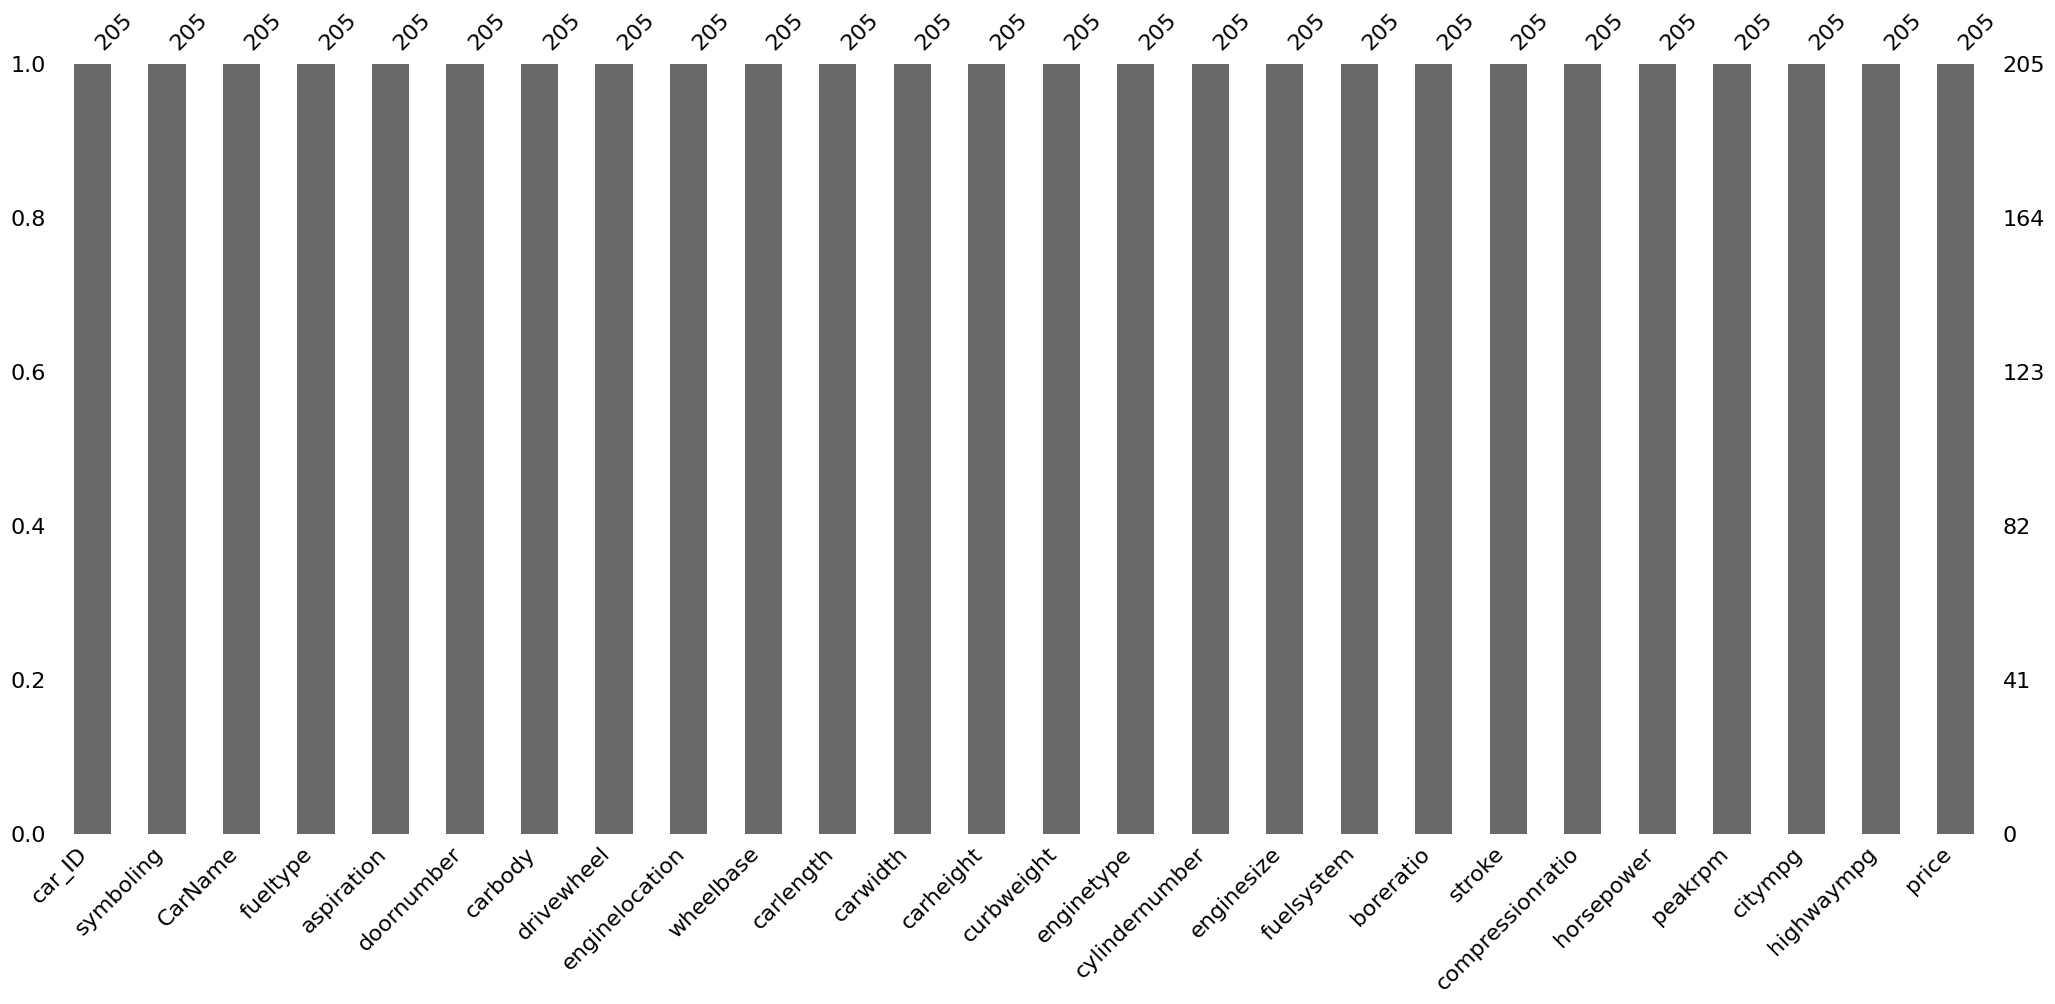

In [ ]:
# exploratory the missing values
import missingno as msno
msno.bar(df);

In [ ]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)
df.drop(columns=["CarName"],inplace=True)

In [ ]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df["CompanyName"].nunique()


28

In [ ]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [ ]:
df["CompanyName"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

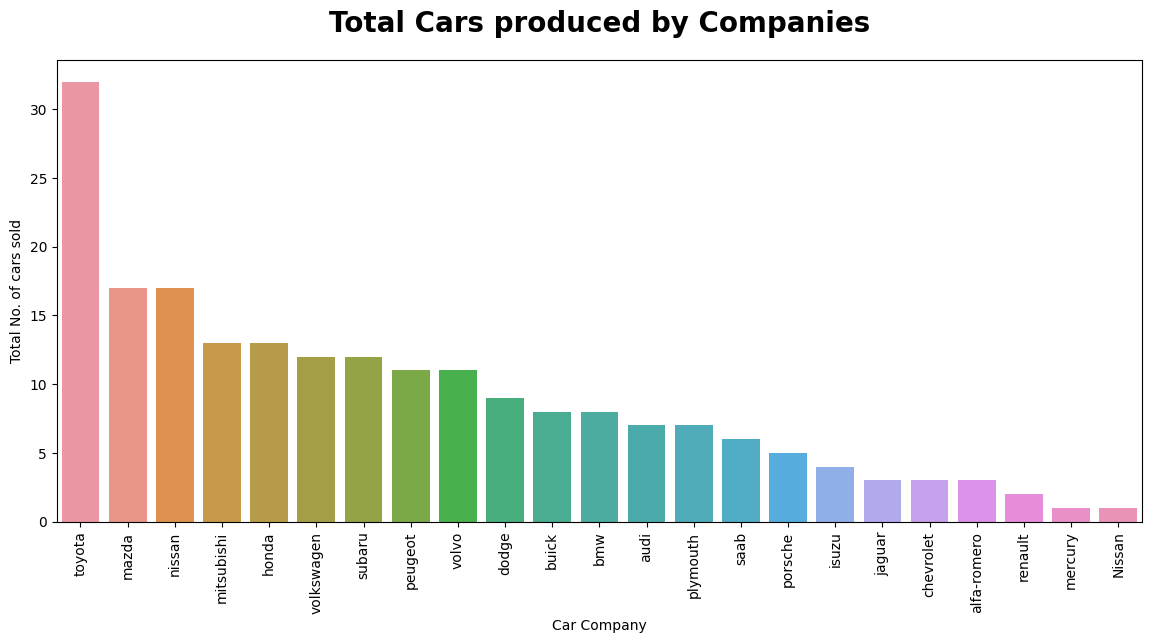

In [ ]:
plt.figure(figsize=(14,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

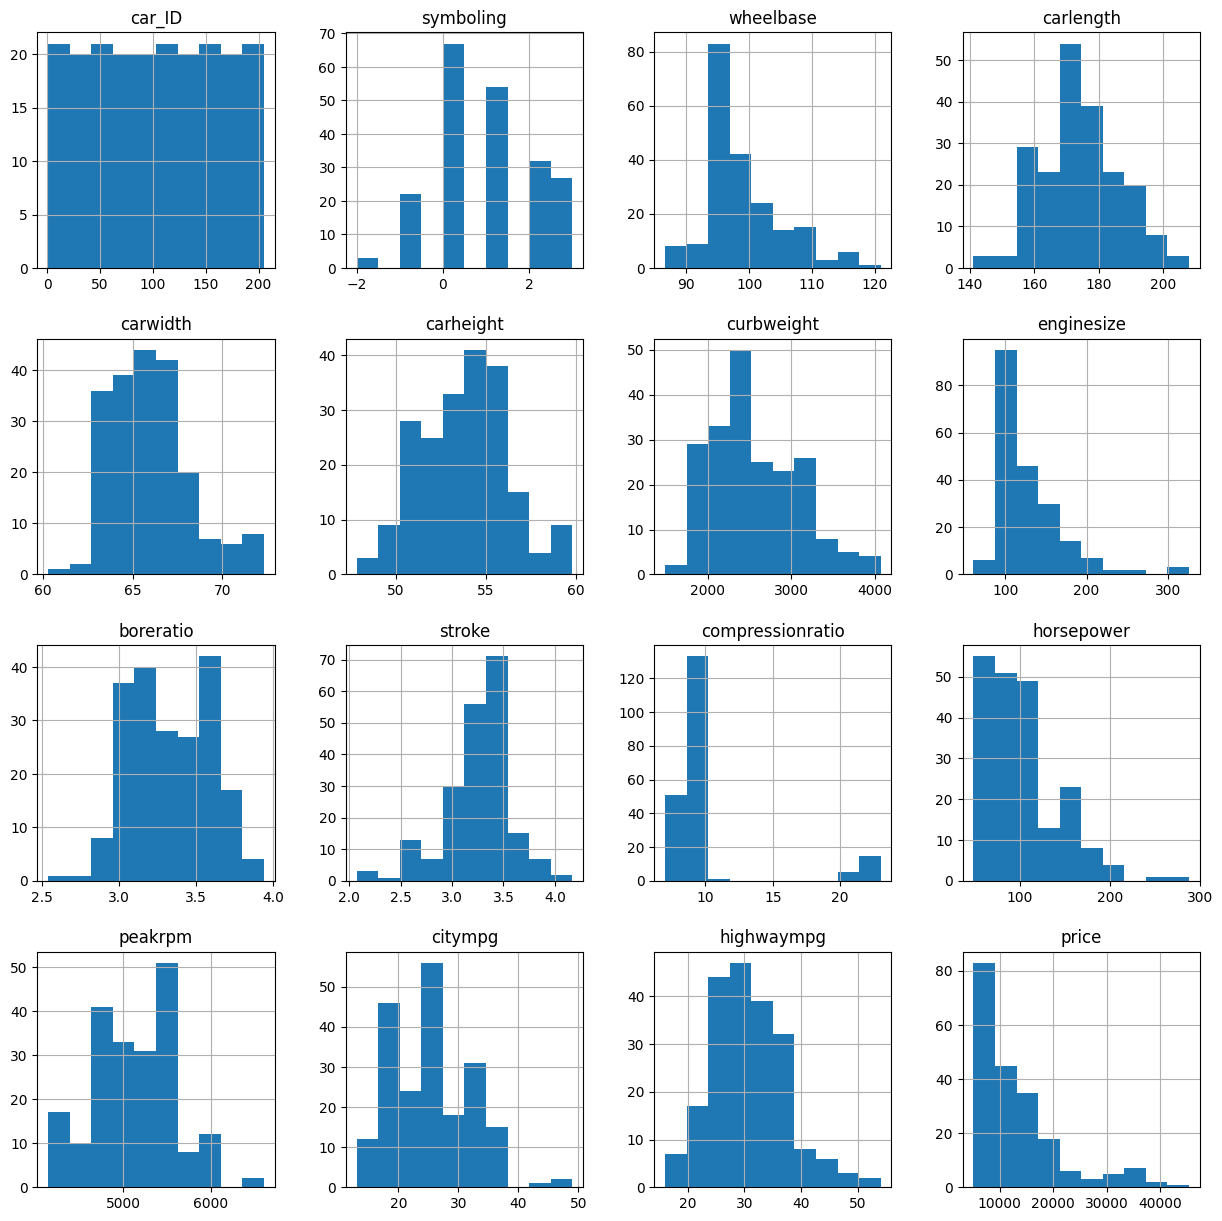

In [ ]:
# plotting histogram
df.hist(figsize=(15,15));

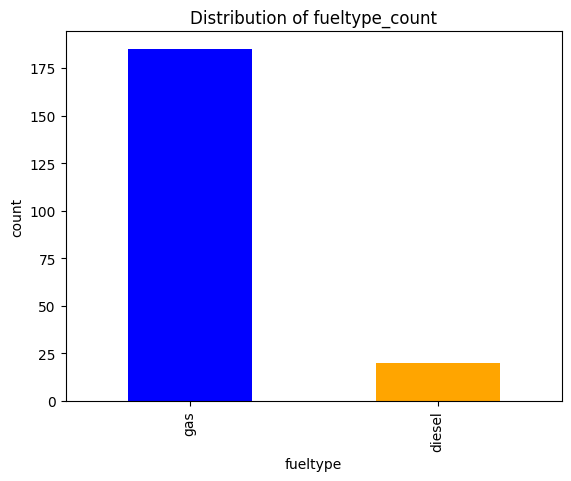

In [ ]:
# plotting bar chart for 'fueltype'.
df.fueltype.value_counts().plot(kind = 'bar', color=["blue", "orange"])
plt.title("Distribution of fueltype_count")
plt.xlabel("fueltype")
plt.ylabel("count");

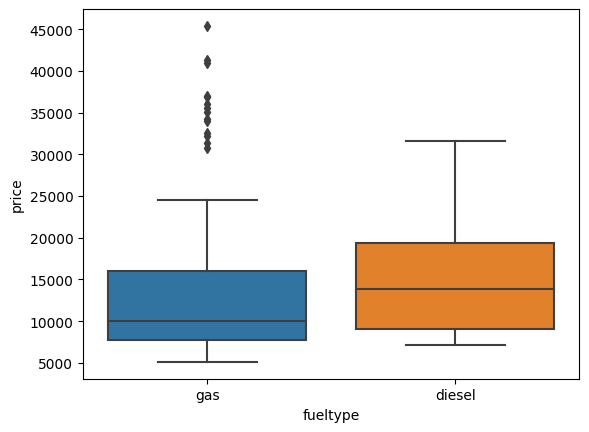

In [ ]:
# creating box plot
sns.boxplot(x ='fueltype',y ="price",data=df)
plt.show()

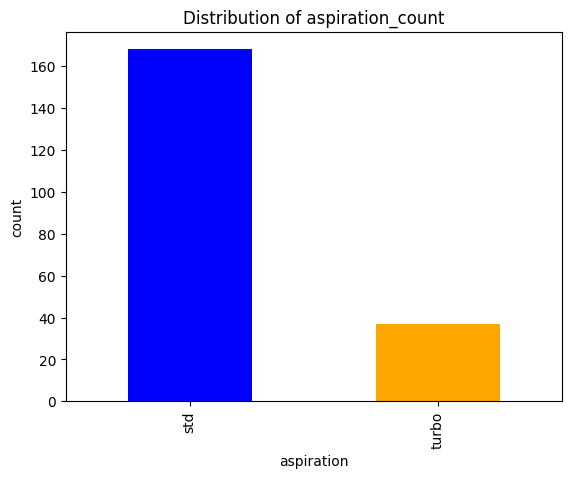

In [ ]:
# plotting bar chart for 'aspiration'.
df.aspiration.value_counts().plot(kind = 'bar', color=["blue", "orange"])
plt.title("Distribution of aspiration_count")
plt.xlabel("aspiration")
plt.ylabel("count");

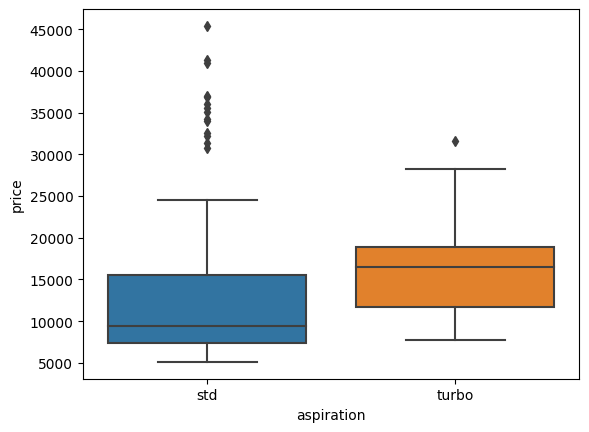

In [ ]:
# creating box plot
sns.boxplot(x ='aspiration',y ="price",data=df)
plt.show()

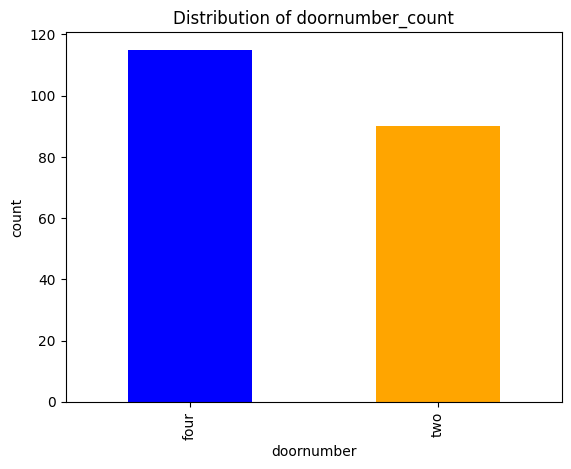

In [ ]:
# plotting bar chart for 'doornumber'.
df.doornumber.value_counts().plot(kind = 'bar', color=["blue", "orange"])
plt.title("Distribution of doornumber_count")
plt.xlabel("doornumber")
plt.ylabel("count");

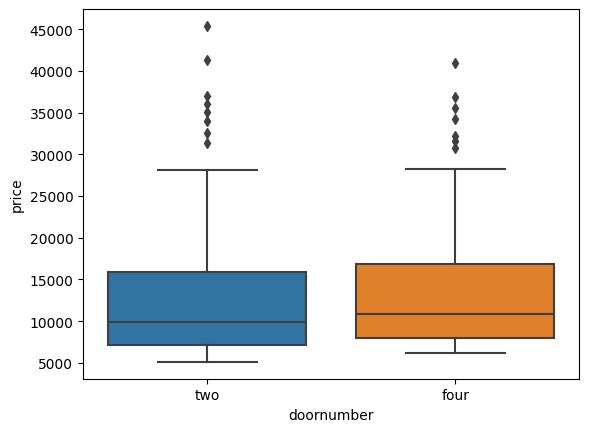

In [ ]:
# creating box plot
sns.boxplot(x ='doornumber',y ="price",data=df)
plt.show()

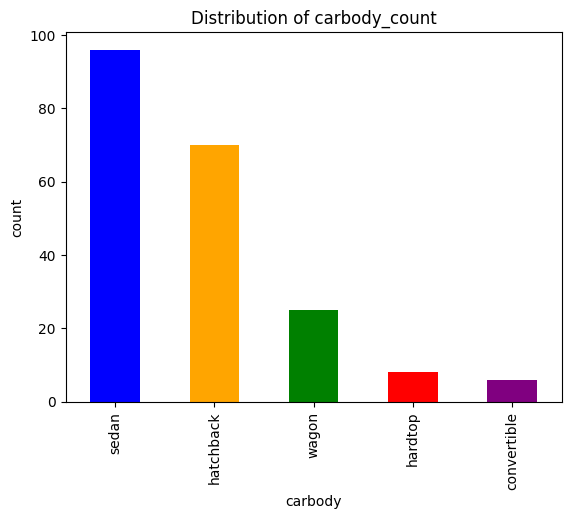

In [ ]:
# plotting bar chart for 'carbody'.
df.carbody.value_counts().plot(kind = 'bar', color=["blue", "orange",'green','red','purple'])
plt.title("Distribution of carbody_count")
plt.xlabel("carbody")
plt.ylabel("count");

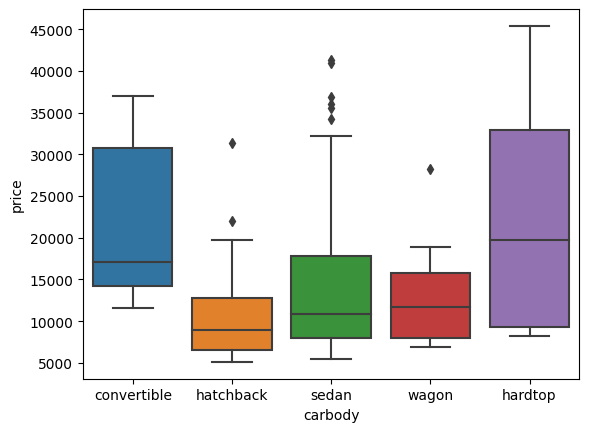

In [ ]:
# creating box plot
sns.boxplot(x ='carbody',y ="price",data=df)
plt.show()

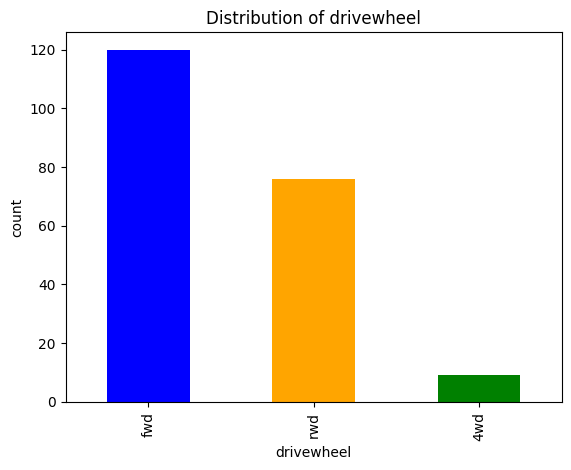

In [ ]:
# plotting bar chart for 'drivewheel'.
df.drivewheel.value_counts().plot(kind = 'bar', color=["blue", "orange",'green','red','purple'])
plt.title("Distribution of drivewheel")
plt.xlabel("drivewheel")
plt.ylabel("count");

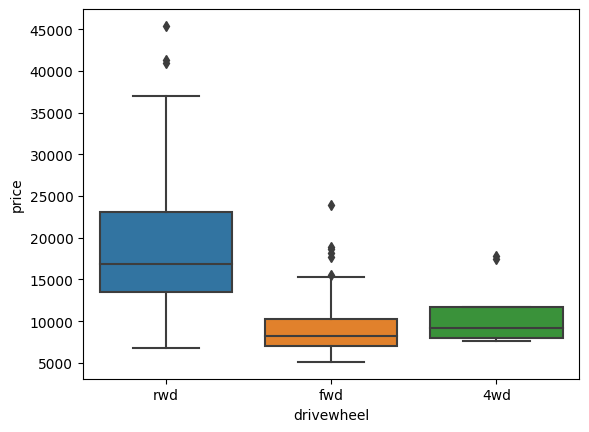

In [ ]:
# creating box plot
sns.boxplot(x ='drivewheel',y ="price",data=df)
plt.show()

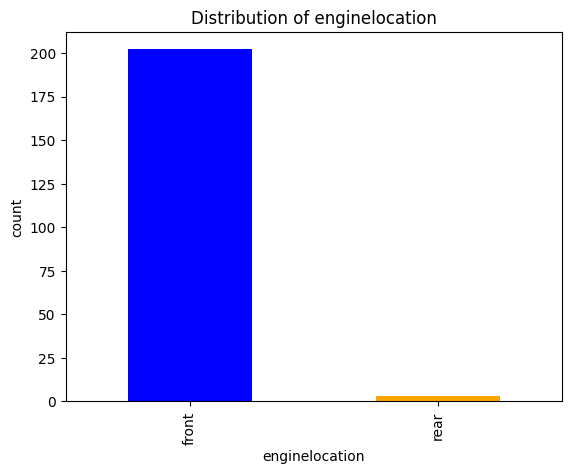

In [ ]:
# plotting bar chart for 'enginelocation'.
df.enginelocation.value_counts().plot(kind = 'bar', color=["blue", "orange"])
plt.title("Distribution of enginelocation")
plt.xlabel("enginelocation")
plt.ylabel("count");

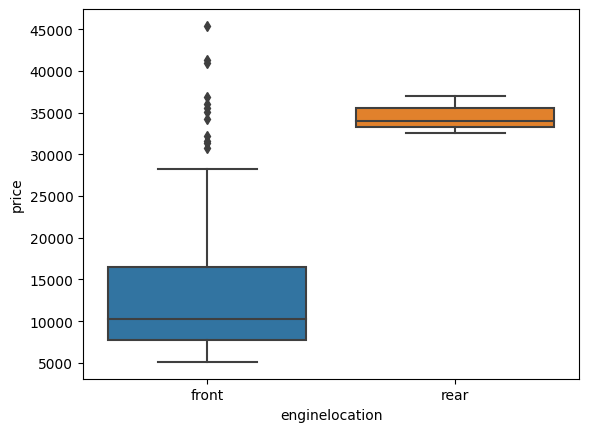

In [ ]:
# creating box plot
sns.boxplot(x ='enginelocation',y ="price",data=df)
plt.show()

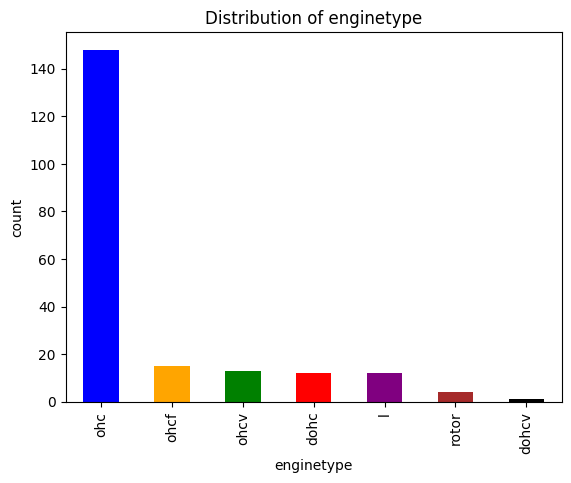

In [ ]:
# plotting bar chart for 'enginetype'.
df.enginetype.value_counts().plot(kind = 'bar', color=["blue", "orange",'green','red','purple','brown','black'])
plt.title("Distribution of enginetype")
plt.xlabel("enginetype")
plt.ylabel("count");

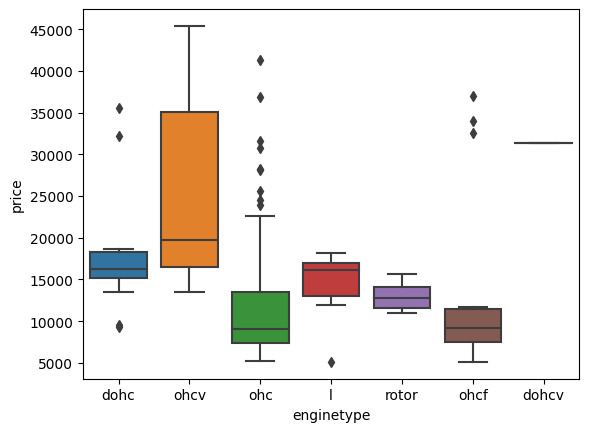

In [ ]:
# creating box plot
sns.boxplot(x ='enginetype',y ="price",data=df)
plt.show()

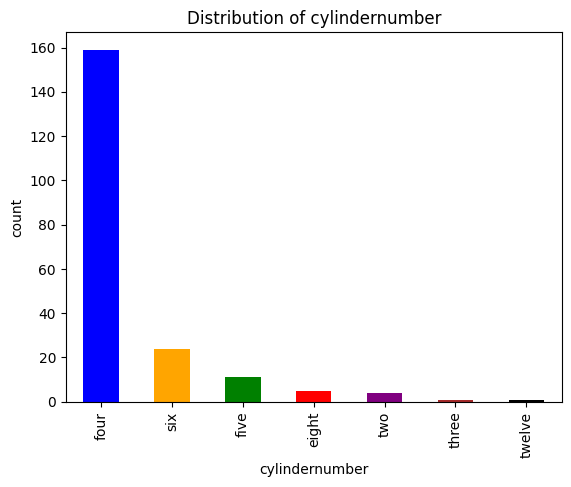

In [ ]:
# plotting bar chart for 'cylindernumber'.
df.cylindernumber.value_counts().plot(kind = 'bar', color=["blue", "orange",'green','red','purple','brown','black'])
plt.title("Distribution of cylindernumber")
plt.xlabel("cylindernumber")
plt.ylabel("count");


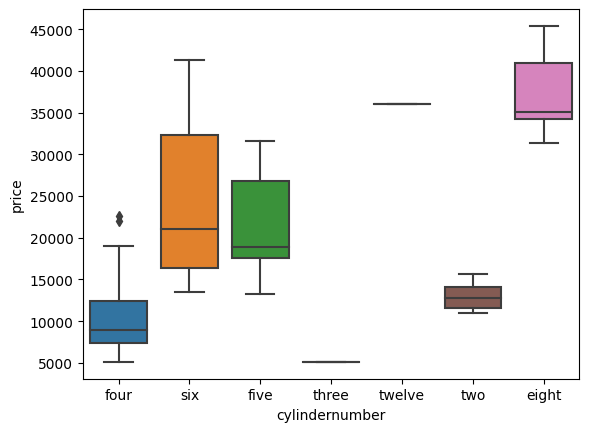

In [ ]:
# creating box plot
sns.boxplot(x ='cylindernumber',y ="price",data=df)
plt.show()

# Feature Engineering


In [ ]:
df1 = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
df1

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,...,10704.88,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


In [ ]:
df = df.merge(df1.T,how="left",on="CompanyName")


In [ ]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)


In [ ]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


# Data Preprocessing

In [ ]:
df2 = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
              ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
              'price','CarsRange']]

In [ ]:
df2.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


In [ ]:
df2 = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=df2)

In [ ]:
df2

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0,...,0,0,0,0,1,0,0,0,1,0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0,...,0,0,0,0,1,0,0,0,1,0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0,...,0,0,0,0,1,0,0,0,1,0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CompanyName       205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']
df2[num_cols] = sc.fit_transform(df2[num_cols])

In [ ]:
df2.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,...,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,...,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,...,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,...,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,...,0,0,0,0,1,0,0,0,1,0


# Model Building




In [ ]:
# # feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = df2.drop(columns=["price"])
y = df2["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
# count the number rows and columns for x_test
x_test.shape

(62, 48)

In [ ]:
# count the number rows and columns for x_train
x_train.shape

(143, 48)

In [ ]:
# count the number rows for y_test
y_test.shape

(62,)

In [ ]:
# count the number rows for y_train
y_train.shape

(143,)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Make predictions
y_pred = regressor.predict(x_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('r2_score gor the accuracy:',(r2)*100)


r2_score gor the accuracy: 71.4166517628355


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Create and train the linear regression model
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

# Make predictions
y_pred = regressor.predict(x_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('r2_score gor the accuracy:',(r2)*100)

r2_score gor the accuracy: 75.57723831233622


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the linear regression model
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

# Make predictions
y_pred = regressor.predict(x_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('r2_score gor the accuracy:',(r2)*100)

r2_score gor the accuracy: 88.43321972989332


# conclusion

Hence we got accuracy on different Regression

-Linear Regression  got accuracy 71%

-Decision Tree Regressor got accuracy 81%

-Random Forest Regressor got accuracy 88%